In [264]:
# General libraries
import pandas as pd
import numpy as np

# Graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# Scikit Learn libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

# **Load Dataset**

* Rosetta features description: https://www.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types





In [265]:
df_solubility = pd.read_csv("data/complex_raw_data.csv")

In [266]:
df_solubility.head()

,SCORE:,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,...,omega,overlap_chainbreak,p_aa_pp,pro_close,rama_prepro,ref,time,yhh_planarity,description,solubility
0,SCORE:,-470.914,-470.914,0.000,-1203.414,338.522,-341.858,2.604,46.000,129.335,...,11.135,0.0,-34.513,0.769,7.706,60.218,1.0,0.108,pdb1a0f.ent_A_0001_0001,77
1,SCORE:,-619.930,-619.930,0.000,-1890.675,497.641,-474.868,3.522,61.099,236.580,...,18.094,0.0,-48.935,4.452,21.634,147.414,1.0,0.158,pdb1a5t.ent_A_0001_0001,38
2,SCORE:,-265.255,-265.255,0.000,-835.965,263.453,-240.659,1.869,35.778,110.637,...,5.542,0.0,-22.884,0.475,-1.901,54.992,0.0,0.023,pdb1a6j.ent_A_0001_0001,83
3,SCORE:,-844.622,-844.622,-0.844,-2087.197,547.917,-575.513,4.085,69.996,265.698,...,11.092,0.0,-68.061,2.464,-4.538,88.832,0.0,1.059,pdb1a99.ent_A_0001_0001,62
4,SCORE:,-830.058,-830.058,0.000,-1848.881,425.681,-545.863,3.959,58.497,194.939,...,7.321,0.0,-43.925,3.180,12.627,91.631,0.0,0.289,pdb1abe.ent_A_0001_0001,87


# Preprocessing

In [267]:
# Check if there is any missing value.
# Must return 0.
df_solubility.isna().sum().sum()

0

In [268]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SCORE:               405 non-null    object 
 1   total_score          405 non-null    float64
 2   score                405 non-null    float64
 3   dslf_fa13            405 non-null    float64
 4   fa_atr               405 non-null    float64
 5   fa_dun               405 non-null    float64
 6   fa_elec              405 non-null    float64
 7   fa_intra_rep         405 non-null    float64
 8   fa_intra_sol_xover4  405 non-null    float64
 9   fa_rep               405 non-null    float64
 10  fa_sol               405 non-null    float64
 11  hbond_bb_sc          405 non-null    float64
 12  hbond_lr_bb          405 non-null    float64
 13  hbond_sc             405 non-null    float64
 14  hbond_sr_bb          405 non-null    float64
 15  linear_chainbreak    405 non-null    flo

In [269]:
# Are all columns with significant value?
df_solubility.describe()

,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,...,lk_ball_wtd,omega,overlap_chainbreak,p_aa_pp,pro_close,rama_prepro,ref,time,yhh_planarity,solubility
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.0,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,-660.909341,-660.909343,-0.031175,-1662.169333,417.837035,-461.458563,3.185533,56.908037,195.155232,997.474953,...,-40.763867,26.701625,0.0,-52.729393,2.034030,8.808395,97.757899,0.059259,0.205395,59.419753
std,372.176345,372.176338,0.409363,881.899785,227.145880,245.769657,1.628280,29.314179,116.803439,538.269300,...,21.969469,26.211415,0.0,26.769766,2.438288,20.412649,52.213834,0.236401,0.242374,32.366429
min,-2145.657000,-2145.657000,-5.404000,-5693.017000,58.140000,-1609.998000,0.500000,7.690000,13.187000,98.422000,...,-140.635000,0.406000,0.0,-189.837000,0.056000,-40.344000,0.160000,0.000000,0.000000,2.000000
25%,-888.386000,-888.386000,0.000000,-2136.624000,256.230000,-601.431000,2.001000,34.343000,109.714000,574.828000,...,-51.688000,8.171000,0.0,-66.829000,0.886000,-5.907000,57.928000,0.000000,0.037000,30.000000
50%,-621.309000,-621.309000,0.000000,-1581.975000,374.421000,-432.050000,2.933000,53.377000,175.765000,922.336000,...,-38.137000,18.850000,0.0,-49.317000,1.513000,6.711000,92.886000,0.000000,0.125000,64.000000
75%,-392.645000,-392.645000,0.000000,-965.458000,518.917000,-268.588000,4.032000,70.347000,250.788000,1288.549000,...,-23.972000,35.629000,0.0,-33.371000,2.458000,20.826000,128.078000,0.000000,0.266000,86.000000
max,108.085000,108.085000,4.902000,-152.808000,1496.329000,-34.770000,10.779000,204.734000,787.426000,3498.846000,...,-4.531000,167.643000,0.0,-5.532000,24.243000,108.660000,288.724000,1.000000,1.904000,133.000000


In [270]:
df_solubility['description'].describe()

count                         405
unique                        405
top       pdb1a0f.ent_A_0001_0001
freq                            1
Name: description, dtype: object

In [271]:
# Remove 'yhh_planarity', 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value.
df_solubility.drop(columns=[
    'yhh_planarity', 
    'overlap_chainbreak', 
    'linear_chainbreak',
    'SCORE:'], 
    axis=1, inplace=True)


# Remove description because each row have a diferent value. Basicaly an index.
df_solubility.drop(columns=['description'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

## Distribution

array([[<AxesSubplot:title={'center':'total_score'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'dslf_fa13'}>,
        <AxesSubplot:title={'center':'fa_atr'}>,
        <AxesSubplot:title={'center':'fa_dun'}>],
       [<AxesSubplot:title={'center':'fa_elec'}>,
        <AxesSubplot:title={'center':'fa_intra_rep'}>,
        <AxesSubplot:title={'center':'fa_intra_sol_xover4'}>,
        <AxesSubplot:title={'center':'fa_rep'}>,
        <AxesSubplot:title={'center':'fa_sol'}>],
       [<AxesSubplot:title={'center':'hbond_bb_sc'}>,
        <AxesSubplot:title={'center':'hbond_lr_bb'}>,
        <AxesSubplot:title={'center':'hbond_sc'}>,
        <AxesSubplot:title={'center':'hbond_sr_bb'}>,
        <AxesSubplot:title={'center':'lk_ball_wtd'}>],
       [<AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'p_aa_pp'}>,
        <AxesSubplot:title={'center':'pro_close'}>,
        <AxesSubplot:title={'center':'rama_prepro'}>,
        <

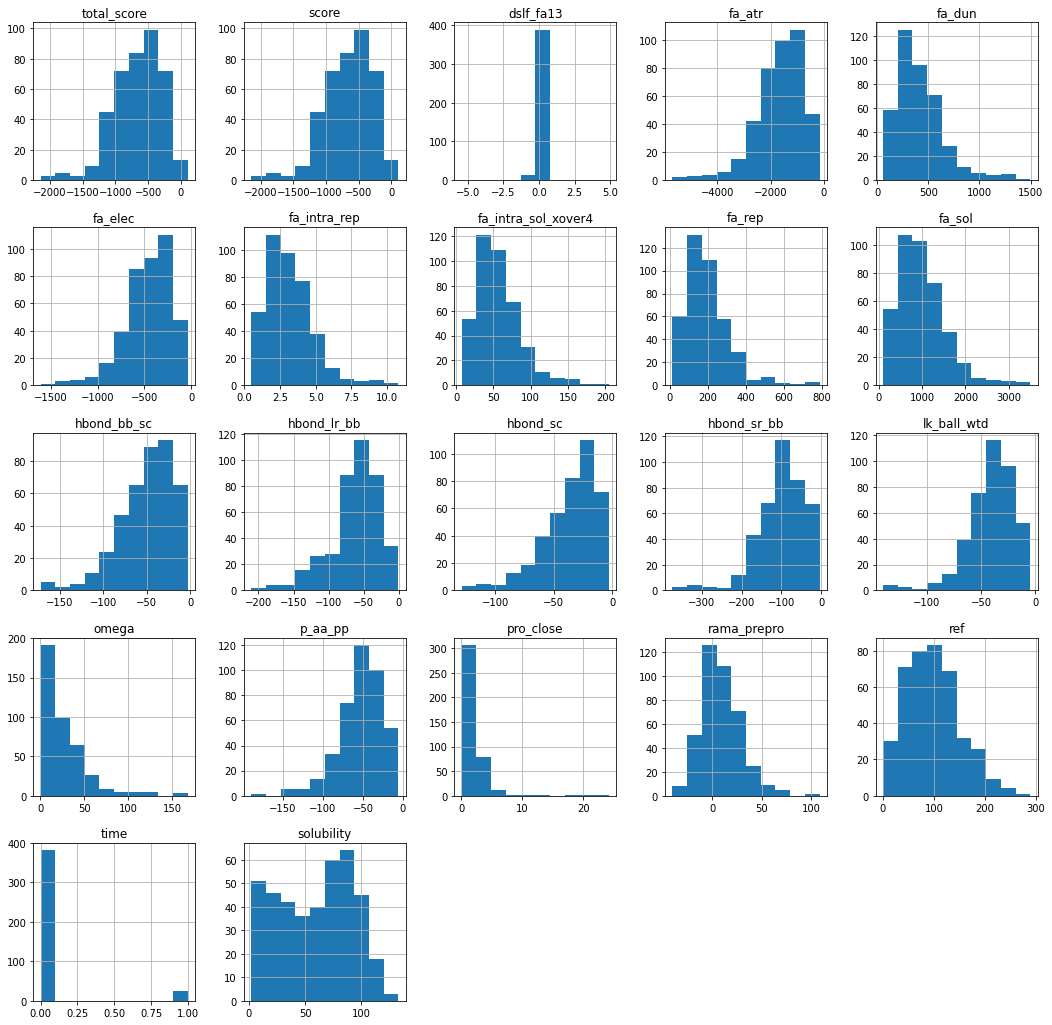

In [272]:
df_solubility.hist(figsize=(18, 18))

array([[<AxesSubplot:title={'center':'total_score'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'dslf_fa13'}>,
        <AxesSubplot:title={'center':'fa_atr'}>,
        <AxesSubplot:title={'center':'fa_dun'}>],
       [<AxesSubplot:title={'center':'fa_elec'}>,
        <AxesSubplot:title={'center':'fa_intra_rep'}>,
        <AxesSubplot:title={'center':'fa_intra_sol_xover4'}>,
        <AxesSubplot:title={'center':'fa_rep'}>,
        <AxesSubplot:title={'center':'fa_sol'}>],
       [<AxesSubplot:title={'center':'hbond_bb_sc'}>,
        <AxesSubplot:title={'center':'hbond_lr_bb'}>,
        <AxesSubplot:title={'center':'hbond_sc'}>,
        <AxesSubplot:title={'center':'hbond_sr_bb'}>,
        <AxesSubplot:title={'center':'lk_ball_wtd'}>],
       [<AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'p_aa_pp'}>,
        <AxesSubplot:title={'center':'pro_close'}>,
        <AxesSubplot:title={'center':'rama_prepro'}>,
        <

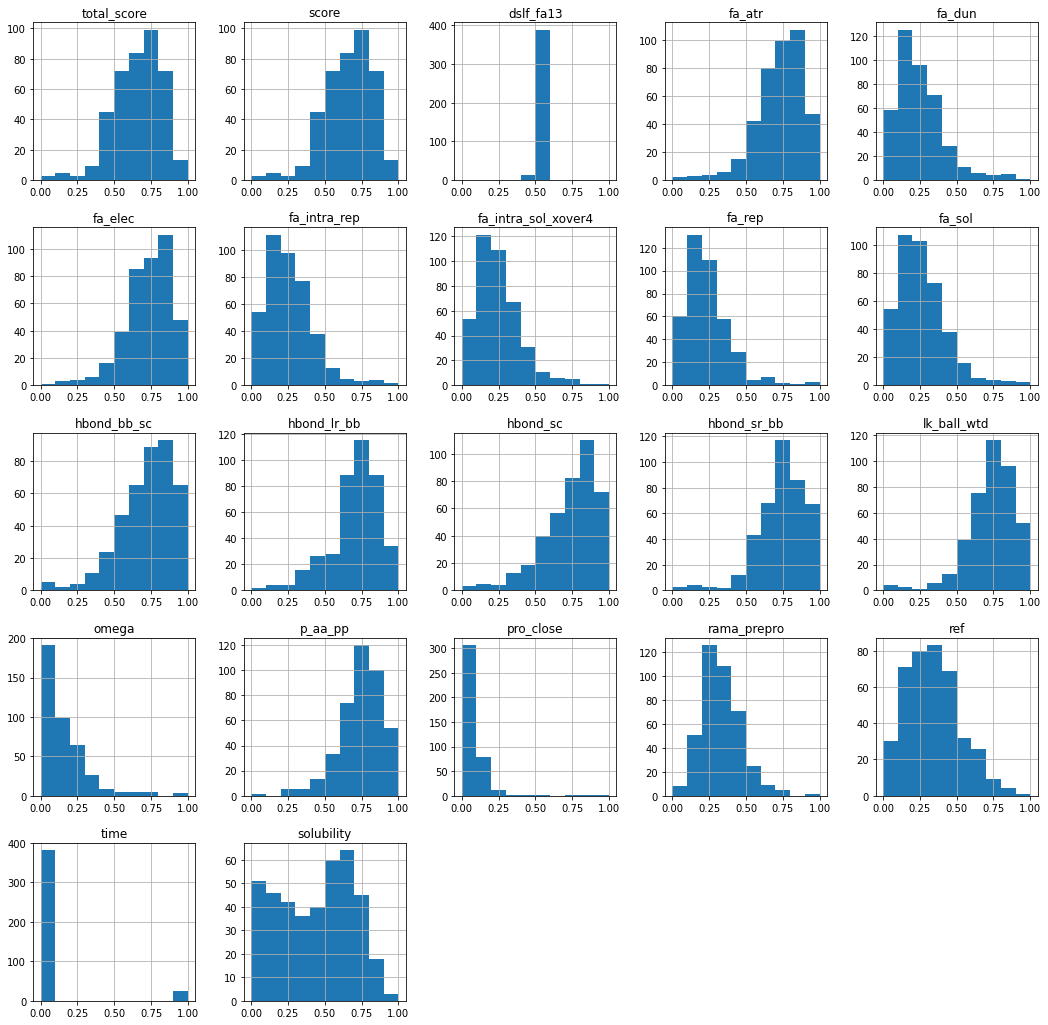

In [273]:
# Data Standardization/Escalation

df_scaler = df_solubility.copy()

scaler = MinMaxScaler()

df_new = scaler.fit_transform(df_scaler)

cols = df_scaler.columns

df_plot = pd.DataFrame(data=df_new, columns=cols)

df_plot.hist(figsize=(18, 18))

# Correlation

In [274]:
# Heatmap of correlation matrix

corr = df_solubility.corr()
data = [go.Heatmap( z=corr.values, x=list(corr.columns), y=list(corr.index), colorscale='Viridis')]
iplot(data, filename='pandas-heatmap')

# Anomaly Detection (outliers)

Two models were used:
* Isolation Forest;
* Local Outlier Factor (LOF).

## Isolation Forest (IF)

Some links to better understand the topic:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [275]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=42)
#df = df_solubility.copy()
df = df_solubility.copy().drop(columns=['solubility'])
model.fit(df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [276]:
anomaly_score = model.predict(df)
scores = model.decision_function(df)

df['IF_anomaly_score'] = anomaly_score
df['IF_scores'] = scores
df[df['IF_anomaly_score']==-1][['IF_scores']].sort_values(by=['IF_scores'])

,IF_scores
139,-0.262036
109,-0.220063
345,-0.206957
237,-0.203977
269,-0.187313
225,-0.173017
262,-0.168038
317,-0.167842
323,-0.155992
276,-0.143469


## Local Outlier Factor (LOF)

Some links to better understand the topic:
* https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [277]:
# Model specification
model_LOF = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.1)

# Model fitting
lof_y_pred = model_LOF.fit_predict(df_solubility.copy().drop(columns=['solubility']))
#lof_scores = model_LOF.decision_function(df)

In [278]:
df['LOF_y_pred'] = lof_y_pred

df.head()

,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,...,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,time,IF_anomaly_score,IF_scores,LOF_y_pred
0,-470.914,-470.914,0.000,-1203.414,338.522,-341.858,2.604,46.000,129.335,717.160,...,-29.718,11.135,-34.513,0.769,7.706,60.218,1.0,1,0.047649,1
1,-619.930,-619.930,0.000,-1890.675,497.641,-474.868,3.522,61.099,236.580,1104.089,...,-47.973,18.094,-48.935,4.452,21.634,147.414,1.0,1,0.043023,1
2,-265.255,-265.255,0.000,-835.965,263.453,-240.659,1.869,35.778,110.637,508.578,...,-23.848,5.542,-22.884,0.475,-1.901,54.992,0.0,1,0.095872,1
3,-844.622,-844.622,-0.844,-2087.197,547.917,-575.513,4.085,69.996,265.698,1250.822,...,-54.162,11.092,-68.061,2.464,-4.538,88.832,0.0,1,0.074371,1
4,-830.058,-830.058,0.000,-1848.881,425.681,-545.863,3.959,58.497,194.939,1129.652,...,-47.118,7.321,-43.925,3.180,12.627,91.631,0.0,1,0.099765,1


## Compare Isolation forest VS LOF predictions

In [279]:
lof_predictions = df.index[df['LOF_y_pred'] == -1].tolist()
print(lof_predictions)

[8, 18, 27, 31, 42, 61, 72, 76, 90, 107, 110, 115, 136, 139, 147, 148, 154, 156, 168, 170, 181, 197, 205, 210, 232, 250, 253, 259, 266, 284, 295, 304, 317, 320, 326, 337, 338, 362, 380, 389, 396]


In [280]:
if_predictions = df.index[df['IF_anomaly_score'] == -1].tolist()
print(if_predictions)

[15, 18, 45, 57, 72, 74, 109, 129, 139, 144, 146, 154, 170, 185, 197, 210, 225, 232, 237, 239, 240, 242, 246, 252, 262, 266, 269, 276, 284, 297, 306, 317, 320, 323, 326, 334, 337, 345, 361, 393, 396]


In [281]:
if_lof_match_values = []

for i in lof_predictions:
    if i in if_predictions:
        if_lof_match_values.append(i)

print(if_lof_match_values)

[18, 72, 139, 154, 170, 197, 210, 232, 266, 284, 317, 320, 326, 337, 396]


In [282]:
print(len(if_predictions))
print(len(lof_predictions))

print(len(if_lof_match_values))

41
41
15


## Compare IF and LOF matching values with strange values from histogram

In [283]:
# 'pro_close' column seemed to have some distant values (possible outliers)
# Verify how many values are above 0.5 (use standardized dataset)

filtered = standardized_df.query("pro_close >= 0.5")
print('Number of indexes above estimated \'pro_close\' value: {}'.format(filtered.shape[0]))

# Compare filtered pro_close list with the IF and LOF matching predictions
filtered_list = filtered.index.tolist()
intersection = set(filtered_list).intersection(if_lof_match_values)
print(intersection)

Number of indexes above estimated 'pro_close' value: 6
{18, 317, 197, 326}


In [284]:
# Remove same indexes

#print(df.shape[0])
#df.drop(index=if_lof_match_values, inplace=True)
#print(df.shape[0])

# Create Treated Data .CSV

In [285]:
df_solubility.to_csv('data/complex_processed_data.csv', index=False)


standardized_df = pd.DataFrame(df_new, columns =df_solubility.columns.to_list())
standardized_df.to_csv('data/complex_processed_standardized_data.csv', index=False)

# Conclusions / Overview

* No NA values;
* Only working with float64 values;
* Target ranges from 2 to 133;
* Removed 'yhh_planarity', 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value;
* Removed 'description' because each row have a diferent value. Basicaly an index;
* Plotted histograms with raw and standardized values to check data distribution (no anomalies detected);
* Plotted heatmap to check columns correlations;
* Applied Isolation Forest and Local Outlier Factor to verify outliers (compared the results from the 2 models and 15/41 values matched);
* Verified how many indexes are equal or above 0.2 and 0.5 for 'pro_close' column on an stardadized dataset. 20 and 6 values were found respectively.
* Compared the indexes from the IF_LOF predictions with the pro_close results.Six and 4 values matched for 0.2 and 0.5 interations.
* Generated 2 .csv files: one without stardadization and other with.